# Ex08 Seaborn

In [89]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [90]:
con = sqlite3.connect("../data/checking-logs.sqlite")
cur = con.cursor()

In [91]:
data = pd.read_sql("""
            SELECT uid, timestamp, numTrials
            FROM checker
            WHERE
                status = 'ready'
                AND uid LIKE 'user%'
                AND labname = 'project1'
            
            """
            ,con, parse_dates='timestamp')
data

,uid,timestamp,numTrials
0,user_4,2020-04-17 05:19:02.744528,1
1,user_4,2020-04-17 05:22:45.549397,2
2,user_4,2020-04-17 05:34:24.422370,3
3,user_4,2020-04-17 05:43:27.773992,4
4,user_4,2020-04-17 05:46:32.275104,5
...,...,...,...
946,user_19,2020-05-15 10:22:39.698523,26
947,user_19,2020-05-15 10:22:46.248162,27
948,user_19,2020-05-15 10:23:18.043212,28
949,user_28,2020-05-15 10:38:14.430013,27


In [92]:
data['timestamp'] = data.timestamp.dt.date

In [93]:
plot_data = data.groupby(['uid','timestamp'], as_index = False)['numTrials'].max()
plot_data = plot_data.sort_values(['uid', 'timestamp'])

plot_data

,uid,timestamp,numTrials
0,user_1,2020-05-14,11
1,user_10,2020-05-12,7
2,user_10,2020-05-13,21
3,user_10,2020-05-14,59
4,user_11,2020-05-03,1
...,...,...,...
89,user_4,2020-05-13,137
90,user_4,2020-05-14,164
91,user_6,2020-05-13,1
92,user_6,2020-05-14,2


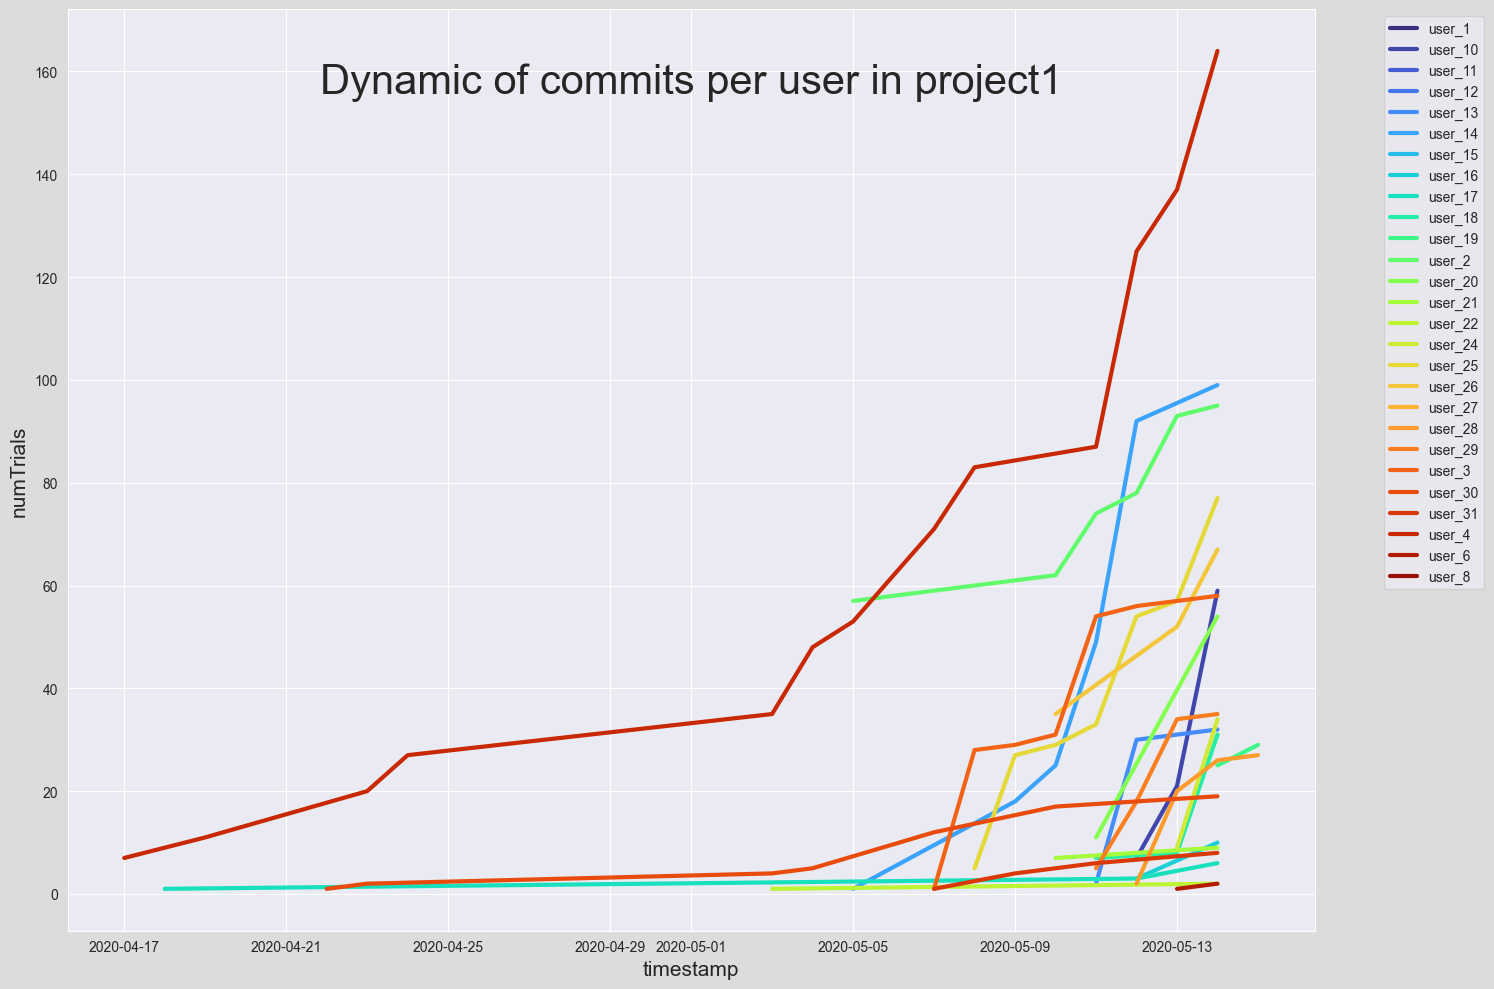

In [94]:
sns.set_style('darkgrid')

n_users = plot_data['uid'].nunique()

palette = sns.color_palette("turbo", n_colors=n_users)

fig, ax = plt.subplots(figsize=(15, 10))
fig.patch.set_facecolor('#DCDCDC')

sns.lineplot(
    data=plot_data,
    x='timestamp',
    y='numTrials',
    hue='uid',
    palette=palette,
    linewidth=3,
    ax=ax
)

ax.set_title('Dynamic of commits per user in project1', fontsize=30, y=0.9)
ax.set_xlabel('timestamp', fontsize=15)
ax.set_ylabel('numTrials', fontsize=15)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### Which user was the leader in the number of commits almost all of the time?

# Answer: user_4

### Which user was the leader for only a short period of time?

# Answer: user_2

In [95]:
con.close()